### In this notebook
1. Choosing the proper number of clusters by looking at the dendrogram
2. Interpreting the results of hierarchical clustering

### Importing necessary libraries and setting the option to display all columns and rows in a dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importing the dataset containing PCs values

In [2]:
df = pd.read_csv('final.csv')
df.shape

(1582, 100)

### Plotting the dendrogram and choosing the proper number of clusters

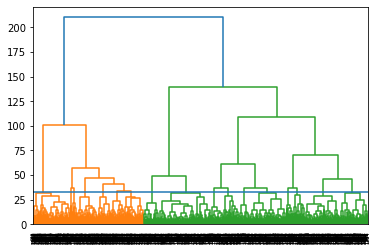

In [78]:
Z = linkage(df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                                      'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                      'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                                      'PC16', 'PC17', 'PC18']],
            method='ward',
            metric='euclidean')
dn = dendrogram(Z)
plt.axhline(y=33)
plt.show()

In [3]:
Z = linkage(df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                                      'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                      'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                                      'PC16', 'PC17', 'PC18']], 'ward')
df['cluster_labels'] = fcluster(Z, 18, criterion='maxclust')

In [82]:
df[df['cluster_labels']==7]

,Player,Nation,Pos,Squad,Comp,CrdY/90,CrdR/90,G/90,A/90,PKatt,xA/90,(G-xG)/90,Sh/90,PassAtt/90,Prog/90,Cmp%,ShortAtt/90,LongAtt/90,(A-xA)/90,(1/3)/90,PPA/90,CrsPA/90,DeadAtt/90,(PassAtt:FK)/90,(PassAtt:CK)/90,(PassAtt:TI)/90,TB/90,UndPress/90,Sw/90,Crs/90,GroundAtt%,LowAtt%,HighAtt%,LeftAtt%,RightAtt%,HeadAtt%,OtherAtt%,Off%,Out%,OppInt%,OppBlk%,(SCA:Drib)/90,(SCA:Sh)/90,(SCA:Fld)/90,(SCA:Def)/90,GCA/90,(GCA:Dead)/90,(GCA:Drib)/90,(GCA:Sh)/90,(GCA:Fld)/90,(GCA:Def)/90,Tkl/90,(Tkl:Def)/90,(Tkl:Mid)/90,(Tkl:Att)/90,DriTkl/90,DriTklW/90,Press/90,SuccPress/90,(Press:Def)/90,(Press:Att)/90,Blk/90,Blk:Sh/90,Blk:ShoT/90,Int/90,Clr/90,TchDef:Pen%,Tch:Mid%,Tch:Att%,Tch:Live%,Dri/90,DriW%,CarrAvgDist,PCarrDist%,PCarries/90,(1/3 Carr)/90,CPA/90,Mis/90,Dis/90,Targ/90,Rec%,Rec:Prog%,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,cluster_labels,kmeans_labels
80,Marco Asensio,ESP,"FW,MF",Real Madrid,La Liga,0.05,0.00,0.24,0.10,0,0.15,0.00,2.02,48.41,3.61,80.2,23.61,7.31,-0.05,2.16,1.83,0.48,3.03,0.53,1.59,0.91,0.19,7.45,1.88,3.65,74.3,11.9,13.8,84.5,10.8,1.4,0.8,0.3,1.6,2.1,4.8,0.29,0.19,0.14,0.10,0.39,0.05,0.05,0.05,0.00,0.00,0.62,0.34,0.29,0.00,1.35,0.19,9.90,2.21,2.31,2.84,0.96,0.00,0.00,0.72,0.48,11.9,40.7,50.2,87.6,2.69,67.9,6.19,53.4,8.32,2.60,0.67,1.30,1.01,55.48,81.8,14.6,3.978706,2.216948,-0.772343,-4.146992,-1.035616,-0.487851,1.957431,-1.849894,0.492321,0.056974,-1.156538,-0.214823,0.381552,0.971119,-0.253133,0.012505,-0.748350,0.752287,7,12
97,Leon Bailey,JAM,"FW,MF",Leverkusen,Bundesliga,0.25,0.00,0.38,0.34,0,0.26,0.09,2.52,40.38,2.39,70.3,17.52,8.49,0.08,1.05,1.43,0.59,3.95,0.46,2.52,0.88,0.17,7.14,2.77,3.82,62.0,16.4,21.5,73.9,19.8,2.7,0.3,0.5,2.2,3.1,5.5,0.42,0.29,0.38,0.04,0.59,0.17,0.04,0.04,0.00,0.04,0.88,0.21,0.42,0.25,0.80,0.25,10.38,3.11,1.76,3.95,0.63,0.00,0.00,0.76,0.38,15.2,39.1,53.1,84.0,6.43,56.9,5.82,59.1,7.31,2.69,1.51,2.27,2.02,53.03,73.5,22.0,8.122110,3.030894,1.029710,-4.401453,1.020110,2.713962,1.405865,-0.506523,1.427529,-0.276045,0.171920,0.142455,-1.206443,0.739250,0.096250,1.449365,0.668939,0.345406,7,9
120,Ross Barkley,ENG,MF,Aston Villa,Premier League,0.00,0.00,0.18,0.06,0,0.21,-0.01,2.23,44.94,4.47,81.0,19.47,7.82,-0.15,2.65,1.59,0.00,5.71,1.35,3.18,0.24,0.00,10.00,1.29,1.18,69.9,13.6,16.5,13.1,78.8,4.2,0.5,0.3,1.0,2.0,2.6,0.53,0.06,0.12,0.00,0.29,0.06,0.00,0.00,0.06,0.00,0.35,0.12,0.24,0.00,0.71,0.18,14.41,3.41,2.06,3.94,1.12,0.12,0.00,0.29,0.47,14.9,42.0,44.3,84.7,2.76,72.3,5.49,54.5,4.76,1.65,0.65,2.00,2.24,48.12,79.3,12.8,3.406364,0.656561,-1.523718,-3.013967,0.284410,-0.787363,-1.422816,-2.973672,0.860056,1.671749,-0.417517,0.583312,0.947960,-0.755843,2.154532,-0.023918,0.252552,0.121871,7,12
128,Musa Barrow,GAM,"FW,MF",Bologna,Serie A,0.00,0.00,0.25,0.25,1,0.16,-0.03,2.77,36.18,2.71,71.3,14.98,7.72,0.09,2.37,0.95,0.37,3.78,1.02,2.00,0.43,0.06,5.66,2.46,2.09,62.8,15.1,22.2,10.7,81.4,4.3,0.6,0.7,1.9,4.1,3.3,0.25,0.28,0.06,0.00,0.34,0.06,0.00,0.03,0.00,0.00,0.65,0.18,0.28,0.18,0.86,0.12,14.25,3.69,3.08,6.06,1.35,0.12,0.00,0.43,0.55,17.6,42.3,47.8,85.9,2.40,46.2,5.41,53.4,5.75,1.69,0.80,3.02,1.94,55.11,67.3,22.0,5.354222,-0.152309,0.341568,-2.514557,1.606735,0.460608,-1.455771,-0.362486,1.849445,-0.164280,-0.096440,-1.097718,1.125799,0.800783,-0.738652,-0.299297,0.963481,0.153108,7,15
152,Hatem Ben Arfa,FRA,"MF,FW",Bordeaux,Ligue 1,0.11,0.00,0.11,0.21,0,0.18,-0.02,1.74,47.46,3.65,79.3,22.17,8.36,0.03,2.86,1.22,0.16,7.35,2.59,2.49,0.95,0.11,9.42,2.59,1.96,73.5,9.1,17.4,80.8,14.6,1.9,0.2,0.2,1.8,2.6,2.1,0.63,0.21,0.16,0.05,0.42,0.16,0.11,0.00,0.05,0.00,0.63,0.05,0.48,0.11,0.48,0.05,9.21,3.44,1.06,3.97,0.11,0.00,0.00,0.26,0.00,11.5,52.2,41.3,80.0,6.30,69.7,6.30,58.1,9.47,2.65,1.43,2.33,3.92,55.61,84.4,11.2,5.767523,4.002297,-1.987193,-5.061163,0.198850,1.258305,1.514460,-3.287532,1.452045,-0.093119,1.881332,0.133911,-1.188280,1.005598,3.430582,1.605222,1.103804,1.823417,7,9
174,Federico Bernardeschi,ITA,"DF,MF",Juventus,Serie A,0.28,0.00,0.00,0.19,0,0.20,-0.14,1.20,54.6

In [17]:
df.groupby('cluster_labels')['Player'].count()

cluster_labels
1      32
2     143
3       7
4      25
5     100
6      60
7      63
8      94
9      71
10    245
11     58
12     75
13     50
14    175
15     28
16     58
17    165
18    133
Name: Player, dtype: int64

### PC1 and its main features for each cluster

<AxesSubplot:xlabel='cluster_labels'>

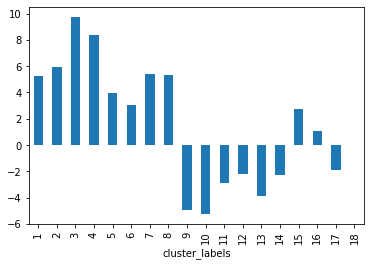

In [37]:
df.groupby('cluster_labels')['PC1'].median().plot.bar()

In [16]:
df.groupby('cluster_labels')['Rec%', 'Clr/90', 'Blk:Sh/90', 'LongAtt/90', '(Tkl:Def)/90', 'Int/90', 'Cmp%', '(Press:Def)/90', 'PassAtt/90', 'PC1', '(SCA:Drib)/90', 'xA/90', 'Dri/90', 'G/90', 'GCA/90', 'OppBlk%', 'CPA/90', 'Dis/90', 'Sh/90', '(Press:Att)/90', 'Mis/90', 'Rec:Prog%', 'Tch:Att%'].mean().round(2)

/var/folders/h9/kp9xv2fs5xd7sx37_5mzfck80000gp/T/ipykernel_3048/3431687272.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster_labels')['Rec%', 'Clr/90', 'Blk:Sh/90', 'LongAtt/90', '(Tkl:Def)/90', 'Int/90', 'Cmp%', '(Press:Def)/90', 'PassAtt/90', 'PC1', '(SCA:Drib)/90', 'xA/90', 'Dri/90', 'G/90', 'GCA/90', 'OppBlk%', 'CPA/90', 'Dis/90', 'Sh/90', '(Press:Att)/90', 'Mis/90', 'Rec:Prog%', 'Tch:Att%'].mean().round(2)


,Rec%,Clr/90,Blk:Sh/90,LongAtt/90,(Tkl:Def)/90,Int/90,Cmp%,(Press:Def)/90,PassAtt/90,PC1,(SCA:Drib)/90,xA/90,Dri/90,G/90,GCA/90,OppBlk%,CPA/90,Dis/90,Sh/90,(Press:Att)/90,Mis/90,Rec:Prog%,Tch:Att%
cluster_labels,,,,,,,,,,,,,,,,,,,,,,,
1,54.60,1.05,0.14,2.47,0.24,0.34,64.05,1.53,25.03,5.32,0.08,0.09,1.26,0.29,0.26,4.53,0.32,1.55,2.37,6.35,2.70,24.04,43.43
2,53.23,0.68,0.12,1.93,0.19,0.38,72.08,1.46,21.92,5.89,0.18,0.10,1.82,0.39,0.29,4.65,0.61,1.78,2.34,7.01,2.63,30.28,46.21
3,84.63,0.20,0.06,11.22,0.17,0.38,75.64,1.51,60.47,10.23,0.56,0.44,5.68,0.44,0.97,3.87,1.40,2.84,3.63,6.28,2.45,15.79,52.83
4,68.64,0.58,0.10,5.12,0.19,0.47,75.40,1.47,37.01,8.22,0.39,0.22,2.90,0.77,0.69,4.09,1.14,1.88,3.32,5.68,2.18,24.94,50.13
5,69.35,0.76,0.11,3.92,0.62,0.78,71.94,4.25,30.57,3.89,0.17,0.11,2.62,0.19,0.27,5.13,0.69,1.98,1.68,5.63,2.20,19.75,41.28
6,82.02,0.68,0.12,7.22,0.60,0.96,80.39,4.18,50.76,3.14,0.18,0.18,2.69,0.19,0.47,3.09,0.58,1.77,1.67,5.44,1.75,13.41,37.80
7,74.05,0.57,0.09,6.60,0.44,0.72,73.33,3.17,37.98,5.40,0.34,0.20,3.33,0.26,0.45,4.33,0.96,2.11,2.22,5.30,2.12,18.70,47.39
8,74.59,0.48,0.09,3.96,0.48,0.76,78.90,3.36,36.94,5.36,0.37,0.16,4.01,0.24,0.44,4.04,1.27,2.32,2.08,5.59,2.27,19.55,46.78
9,97.56,4.02,0.60,12.75,0.97,1.30,90.72,4.83,69.62,-4.98,0.01,0.02,0.53,0.05,0.07,0.77,0.03,0.33,0.52,0.79,0.33,0.69,5.82


### PC2 and its main features for each cluster

<AxesSubplot:xlabel='cluster_labels'>

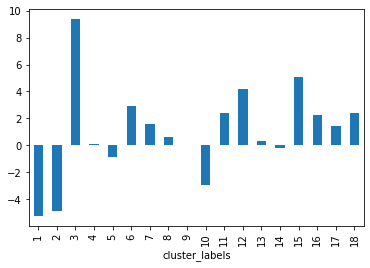

In [38]:
df.groupby('cluster_labels')['PC2'].median().plot.bar()

In [12]:
df.groupby('cluster_labels')['TchDef:Pen%', 'HeadAtt%', 'OtherAtt%', 'Tch:Live%', 'Blk:Sh/90', 'Clr/90', 'PC2', 'Tkl/90', 'Targ/90', 'DeadAtt/90', 'Crs/90', 'DriTkl/90', '(1/3)/90', 'PassAtt/90', 'PPA/90', '(1/3 Carr)/90', 'PCarries/90', 'ShortAtt/90', 'Prog/90'].mean().round(2)

/var/folders/h9/kp9xv2fs5xd7sx37_5mzfck80000gp/T/ipykernel_3048/3932934540.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster_labels')['TchDef:Pen%', 'HeadAtt%', 'OtherAtt%', 'Tch:Live%', 'Blk:Sh/90', 'Clr/90', 'PC2', 'Tkl/90', 'Targ/90', 'DeadAtt/90', 'Crs/90', 'DriTkl/90', '(1/3)/90', 'PassAtt/90', 'PPA/90', '(1/3 Carr)/90', 'PCarries/90', 'ShortAtt/90', 'Prog/90'].mean().round(2)


,TchDef:Pen%,HeadAtt%,OtherAtt%,Tch:Live%,Blk:Sh/90,Clr/90,PC2,Tkl/90,Targ/90,DeadAtt/90,Crs/90,DriTkl/90,(1/3)/90,PassAtt/90,PPA/90,(1/3 Carr)/90,PCarries/90,ShortAtt/90,Prog/90
cluster_labels,,,,,,,,,,,,,,,,,,,
1,27.82,11.21,3.78,93.22,0.14,1.05,-5.25,0.87,49.99,1.10,0.73,0.87,1.38,25.03,0.56,0.55,1.74,12.79,1.80
2,29.79,6.39,2.64,90.71,0.12,0.68,-4.69,0.77,46.21,1.37,0.67,0.82,0.91,21.92,0.52,0.82,2.53,11.48,1.30
3,12.74,1.03,0.44,84.47,0.06,0.20,8.87,1.06,72.19,6.11,2.95,1.45,5.02,60.47,3.69,3.89,11.39,25.72,7.66
4,23.95,3.20,1.24,88.12,0.10,0.58,0.03,0.66,55.69,2.69,1.50,0.90,2.18,37.01,1.55,1.87,5.81,17.57,3.34
5,17.62,4.41,0.95,89.92,0.11,0.76,-0.89,1.62,43.27,1.51,1.59,1.68,1.54,30.57,0.92,1.47,4.45,14.14,2.42
6,12.73,2.65,0.66,88.92,0.12,0.68,3.16,1.79,56.55,2.80,1.43,1.96,3.83,50.76,1.51,2.17,6.39,22.99,4.59
7,16.05,2.73,0.67,85.54,0.09,0.57,1.54,1.22,48.54,4.06,2.26,1.43,2.02,37.98,1.38,1.88,6.05,16.60,3.20
8,19.49,2.59,0.74,89.29,0.09,0.48,0.91,1.36,50.99,1.64,1.61,1.46,1.85,36.94,1.28,2.10,6.92,18.49,3.00
9,21.30,3.10,0.29,91.20,0.60,4.02,-0.08,1.64,59.53,2.13,0.15,1.22,4.60,69.62,0.25,0.82,4.68,20.99,3.70


### PC3 and its main features for each cluster

<AxesSubplot:xlabel='cluster_labels'>

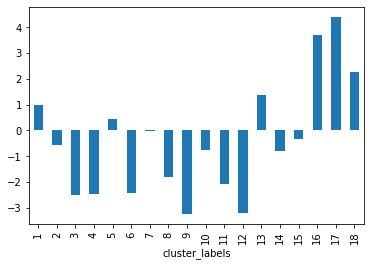

In [39]:
df.groupby('cluster_labels')['PC3'].median().plot.bar()

In [14]:
df.groupby('cluster_labels')['GroundAtt%', 'Tch:Live%', 'Cmp%', 'Targ/90', 'Tch:Mid%', '(1/3)/90', 'RightAtt%', 'UndPress/90', 'TB/90', 'PC3', 'Blk/90', 'OppBlk%', 'Out%', 'Crs/90', 'CrsPA/90', 'DeadAtt/90', 'LowAtt%', '(PassAtt:TI)/90', 'HighAtt%'].mean().round(2)

/var/folders/h9/kp9xv2fs5xd7sx37_5mzfck80000gp/T/ipykernel_3048/2194051388.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster_labels')['GroundAtt%', 'Tch:Live%', 'Cmp%', 'Targ/90', 'Tch:Mid%', '(1/3)/90', 'RightAtt%', 'UndPress/90', 'TB/90', 'PC3', 'Blk/90', 'OppBlk%', 'Out%', 'Crs/90', 'CrsPA/90', 'DeadAtt/90', 'LowAtt%', '(PassAtt:TI)/90', 'HighAtt%'].mean().round(2)


,GroundAtt%,Tch:Live%,Cmp%,Targ/90,Tch:Mid%,(1/3)/90,RightAtt%,UndPress/90,TB/90,PC3,Blk/90,OppBlk%,Out%,Crs/90,CrsPA/90,DeadAtt/90,LowAtt%,(PassAtt:TI)/90,HighAtt%
cluster_labels,,,,,,,,,,,,,,,,,,,
1,47.33,93.22,64.05,49.99,47.04,1.38,47.50,8.88,0.10,1.14,0.94,4.53,2.57,0.73,0.11,1.10,25.85,0.14,26.84
2,63.95,90.71,72.08,46.21,45.34,0.91,59.66,6.08,0.08,-0.50,0.83,4.65,1.89,0.67,0.08,1.37,20.59,0.11,15.46
3,71.43,84.47,75.64,72.19,41.29,5.02,31.66,9.55,0.69,-2.99,0.84,3.87,1.91,2.95,0.52,6.11,10.86,0.61,17.71
4,70.03,88.12,75.40,55.69,42.48,2.18,61.96,7.60,0.23,-2.41,0.71,4.09,1.48,1.50,0.23,2.69,15.30,0.39,14.66
5,66.88,89.92,71.94,43.27,44.22,1.54,66.82,6.52,0.09,0.44,1.41,5.13,2.07,1.59,0.25,1.51,16.66,0.47,16.47
6,73.04,88.92,80.39,56.55,49.03,3.83,72.61,8.32,0.23,-2.10,1.30,3.09,1.28,1.43,0.22,2.80,12.84,0.57,14.14
7,67.51,85.54,73.33,48.54,41.14,2.02,43.73,6.55,0.15,0.05,1.15,4.33,2.04,2.26,0.33,4.06,13.52,0.58,18.97
8,76.25,89.29,78.90,50.99,42.21,1.85,66.60,6.87,0.12,-1.70,1.18,4.04,1.44,1.61,0.24,1.64,12.15,0.50,11.61
9,82.15,91.20,90.72,59.53,53.12,4.60,68.48,6.29,0.04,-3.23,1.53,0.77,1.06,0.15,0.03,2.13,7.21,0.50,10.66


### PC4 and its main features for each cluster

<AxesSubplot:xlabel='cluster_labels'>

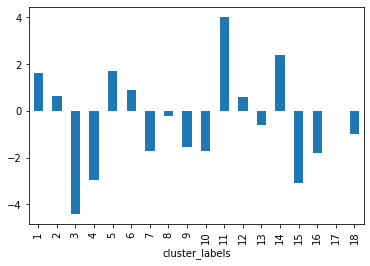

In [40]:
df.groupby('cluster_labels')['PC4'].median().plot.bar()

In [20]:
df.groupby('cluster_labels')['LongAtt/90', 'CarrAvgDist', 'PCarrDist%', 'Sw/90', '(PassAtt:FK)/90', '(PassAtt:CK)/90', 'TchDef:Pen%', 'Clr/90', 'DeadAtt/90', 'PC4', '(SCA:Def)/90', '(Tkl:Def)/90', 'DriTklW/90', 'Tch:Mid%', '(Press:Def)/90', '(Tkl:Att)/90', 'DriTkl/90', 'Tkl/90', '(Tkl:Mid)/90', 'SuccPress/90', 'Press/90'].mean().round(2)

/var/folders/h9/kp9xv2fs5xd7sx37_5mzfck80000gp/T/ipykernel_3048/661163455.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster_labels')['LongAtt/90', 'CarrAvgDist', 'PCarrDist%', 'Sw/90', '(PassAtt:FK)/90', '(PassAtt:CK)/90', 'TchDef:Pen%', 'Clr/90', 'DeadAtt/90', 'PC4', '(SCA:Def)/90', '(Tkl:Def)/90', 'DriTklW/90', 'Tch:Mid%', '(Press:Def)/90', '(Tkl:Att)/90', 'DriTkl/90', 'Tkl/90', '(Tkl:Mid)/90', 'SuccPress/90', 'Press/90'].mean().round(2)


,LongAtt/90,CarrAvgDist,PCarrDist%,Sw/90,(PassAtt:FK)/90,(PassAtt:CK)/90,TchDef:Pen%,Clr/90,DeadAtt/90,PC4,(SCA:Def)/90,(Tkl:Def)/90,DriTklW/90,Tch:Mid%,(Press:Def)/90,(Tkl:Att)/90,DriTkl/90,Tkl/90,(Tkl:Mid)/90,SuccPress/90,Press/90
cluster_labels,,,,,,,,,,,,,,,,,,,,,
1,2.47,3.95,42.96,0.48,0.05,0.02,27.82,1.05,1.10,1.56,0.05,0.24,0.19,47.04,1.53,0.24,0.87,0.87,0.40,3.84,15.34
2,1.93,4.38,47.85,0.44,0.06,0.05,29.79,0.68,1.37,0.59,0.06,0.19,0.17,45.34,1.46,0.23,0.82,0.77,0.35,3.86,15.13
3,11.22,5.38,60.09,2.76,1.76,3.46,12.74,0.20,6.11,-4.90,0.09,0.17,0.32,41.29,1.51,0.35,1.45,1.06,0.55,4.03,13.60
4,5.12,5.14,56.02,1.27,0.61,0.74,23.95,0.58,2.69,-3.02,0.05,0.19,0.20,42.48,1.47,0.20,0.90,0.66,0.27,3.35,12.25
5,3.92,5.41,55.28,0.79,0.34,0.33,17.62,0.76,1.51,1.50,0.06,0.62,0.45,44.22,4.25,0.32,1.68,1.62,0.68,4.86,18.26
6,7.22,5.22,53.44,1.48,0.86,1.04,12.73,0.68,2.80,0.59,0.09,0.60,0.53,49.03,4.18,0.35,1.96,1.79,0.83,5.36,18.69
7,6.60,5.58,55.84,1.70,1.10,2.04,16.05,0.57,4.06,-1.63,0.08,0.44,0.36,41.14,3.17,0.29,1.43,1.22,0.49,4.08,15.02
8,3.96,5.59,57.93,0.86,0.34,0.51,19.49,0.48,1.64,-0.33,0.06,0.48,0.42,42.21,3.36,0.33,1.46,1.36,0.56,4.51,15.89
9,12.75,5.60,55.25,1.77,1.57,0.00,21.30,4.02,2.13,-1.49,0.02,0.97,0.56,53.12,4.83,0.10,1.22,1.64,0.57,3.47,9.92


### Players in each cluster

1. More physical strikers: masters in aerial play, less involved in the offensive maneuver. This cluster includes players like Calvert-Lewin, Dost, Negredo, Pavoletti and Kalifa Coulibaly.
2. Other strikers. This cluster includes players like Lacazette, Schick, Paco Alcácer, Lasagna and Jonathan David.
3. Offensive stars: capable of producing many goals and assists, they can participate in the offensive maneuver through either choral play or individual initiatives, they are at the center of the offensive action. More sought after by teammates, more under the attention of opponents. This cluster includes players like Messi, Neymar, Di Maria and De Bruyne.
4. Complete and more prolific forwards: they are the best at scoring goals, they are more involved in the offensive maneuver with respect to players in clusters 1 and 2. They can also assist their teammates. This cluster includes players like Kane, Lewandowski, Benzema, Cristiano Ronaldo and Depay.
5. Defensive wingers: they play in an advanced and less central position even though they do not excel in terms of goal-scoring or assisting, they can support the offensive maneuver and lend a hand in defense as well. This cluster includes players like Walcott, Herrmann, Guedes, Saelemaekers and Moses Simon.
6. Midfield-Attack connectors: they play in a central and less advanced position with respect to players in the first 5 clusters, their main task is to make the ball progress towards the opponent's goal. They can assist, pass, dribble and score without neglecting the defensive phase. This cluster includes players like Bernardo Silva, Brandt, Muniain, Zielinski and Draxler.
7. Offensive wildcards: more technical, good at dribbling and set-pieces taking, mainly left-footed (or skilled with both foots) players. They give a good contribution to the offensive maneuver and like to vary on the offensive front going to occupy both the central and lateral areas. This cluster includes players like Son, Reus, Oyarzabal, Dybala and Bouanga.
8. Dribblers: mainly wingers, involved in the offensive maneuver and dangerous near the opponent's goal. This cluster includes players like Pulisic, Baumgartner, Vinicius, Kulusevski, and Gelson Martins.
9. Ball-playing central backs: more involved in the construction of the maneuver, more sought after by their teammates, they attempt more passes and advance more with the ball at their feet. This cluster includes players like Thiago Silva, Hummels, Ramos, de Ligt and Marquinhos.
10. Other central backs: this cluster includes players like Maguire, Mustafi, Gabriel Paulista, Demiral and Denayer.
11. Anchormans: midfielders who play in front of the defense, crucial in recovering balls, less central in playmaking. This cluster includes players like Kanté, Kramer, Casemiro, Lucas Leiva and Tchouaméni
12. Playmakers: midfielders who play in front of the defense, crucial in build-up play, less central in ball recovering. This cluster includes players like Xhaka, Emre Can, Parejo, Brozovic and Verratti.
13. Hybrid backs: central backs in a 3-man defense, more defensive full-backs or central backs in a 4-man defense covering the wing of the most offensive full-back. They are similar to the other central backs, but they engage in 1vs1 duels more often and can give their contribution in attack with crosses from the wing. This cluster includes players like Ampadu, Stambouli, Wass, Criscito and Loris Benito.
14. Box-to-box midfielders: they have to give their contribution in both phases and have a more vertical range when compared to the players in cluster 11 and 12. This cluster includes players like Sissoko, Eggestein, Saúl, Mandragora and Basic.
15. Midfield-Attack connectors (set-pieces takers): players that are similar to those in cluster 6, but also specialist in taking corner-kicks and free-kicks. This cluster includes players like James Rodríguez, Demirbay, Canales, Calhanoglu and Payet.
16. Ballistic full-backs/lateral midfielders: players that are good at both crossing and set-pieces taking, playing on the wing and having defensive tasks. This cluster includes players like Digne, Angeliño, Bardhi, Dimarco and Benrahou.
17. Other fullbacks: this cluster includes players like Clyne, Horn, Hugo Mallo, De Silvestri and Nagatomo.
18. Full-backs turning into added forwards: more involved in the build-up play, more inclined to try dribbling and enter the opponent's area looking for the goal or assist. This cluster includes players like Reguilón, Roussillon, Lucas Vazquez, Theo Hernández and Dubois.